**Brian Blaylock**  
**May 15, 2019**

# **Fig. 3.** GLM flash count

![](./figs/Fig-03_GLM-flashes-count-by-month.png)

> FIG. 3. Mean number of GLM flashes for May through September 2018 within the HRRR domain, western, central, and eastern United States (see figure 3).

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5.5,4]
mpl.rcParams['figure.titlesize'] = 10
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 7
mpl.rcParams['ytick.labelsize'] = 7
mpl.rcParams['axes.labelsize'] = 7
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['grid.alpha'] = .5
#mpl.rcParams['figure.subplot.wspace'] = 0.15
#mpl.rcParams['figure.subplot.hspace'] = 0.15

mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .95
mpl.rcParams['legend.labelspacing'] = 0.3
mpl.rcParams['legend.handlelength'] = 1
mpl.rcParams['legend.handletextpad'] = 0.5
mpl.rcParams['legend.borderaxespad'] = 0.3
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.columnspacing'] = 1.0

mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 600

In [2]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')

In [3]:
domains = ['HRRR', 'West', 'Central', 'East']

In [47]:
def get_HRRR_GLM_stats_hov_by_month(DOMAIN, month, year=2018, verbose=False):
    samples = []
    for hour in range(24):
        DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
        FILE = '/%s/%s_%s_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, year, month, hour)
        
        FLASH_DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
        FLASH_FILE = '/GLM_in_HRRR_%s_%s_m%02d_h%02d.csv' % (DOMAIN, year, month, hour)
        
        mean_flashes = []
        mean_events = []
        sample_sum = []
        if os.path.exists(DIR+FILE):
            data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
            
            try:
                flash_data = np.genfromtxt(FLASH_DIR+FLASH_FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
            except:
                if verbose: print('ERROR FLASH:', month, year, hour )
                flash_data = {'GLM_FLASH_COUNT':[np.nan, np.nan, np.nan]}
            
            try:
                samples.append(len(data['DATE']))
            except:
                samples.append(1)
            #print(data['DATE'])
            
            events = data['GLM_Event_COUNT']
            flashes = flash_data['GLM_FLASH_COUNT']
            mean_events.append(np.nanmean(events))
            mean_flashes.append(np.nanmean(flashes))

            if hour == 0:
                mean_events_HOV = np.array(mean_events)
                mean_flashes_HOV = np.array(mean_flashes)
            else:
                mean_events_HOV = np.vstack([mean_events_HOV, mean_events])
                mean_flashes_HOV = np.vstack([mean_flashes_HOV, mean_flashes])
        else:
            samples.append(0)
            if hour == 0:
                mean_events_HOV = np.arange(1,19)*np.nan
                mean_flashes_HOV = np.arange(1,19)*np.nan
            else:
                mean_events_HOV = np.vstack([mean_events_HOV, np.arange(1,19)*np.nan])
                mean_flashes_HOV = np.vstack([mean_flashes_HOV, np.arange(1,19)*np.nan])
                
    return {'samples': samples,
            'events': mean_events_HOV,
            'flashes': mean_flashes_HOV
           }

Working on: HRRR
Working on: West
Working on: Central
Working on: East


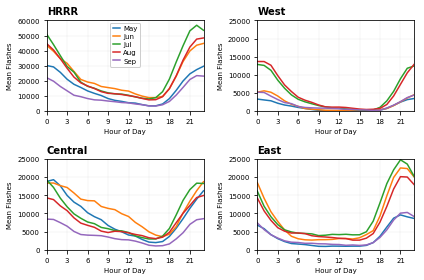

In [5]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

#for i, DOMAIN in enumerate(['HRRR']):
for ax, DOM in zip(axes, domains):
    print('Working on:', DOM)
    plt.sca(ax)
    for m in range(5,10):
        flashes = get_HRRR_GLM_stats_hov_by_month(DOM, m)['flashes']
        plt.plot(flashes, label='%s' % datetime(2018, m, 1).strftime("%b"))
    plt.xticks(range(0,24,3));
    plt.title(DOM, loc='left', fontweight='bold')
    plt.xlabel('Hour of Day')
    if DOM == 'HRRR':
        plt.ylim(ymax=60000)
        plt.legend(loc='upper center')
    else:
        plt.ylim(ymax=25000)
    plt.xlim([0,23])
    plt.ylim(ymin=0)
    plt.ylabel('Mean Flashes')
    plt.grid()

plt.tight_layout()
    
plt.savefig('./figs/Fig-03_GLM-flashes-count-by-month')

# May 2018 versus May 2019

Working on: HRRR
Working on: West
Working on: Central
Working on: East


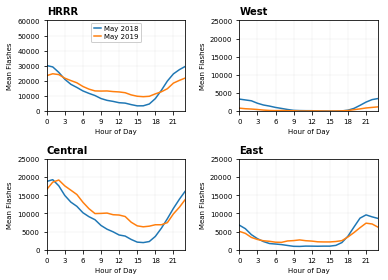

In [51]:
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

#for i, DOMAIN in enumerate(['HRRR']):
for ax, DOM in zip(axes, domains):
    print('Working on:', DOM)
    plt.sca(ax)
    for m in [5]:
        F2019 = get_HRRR_GLM_stats_hov_by_month(DOMAIN=DOM, month=5, year=2019)['flashes']
        F2018 = get_HRRR_GLM_stats_hov_by_month(DOMAIN=DOM, month=5, year=2018)['flashes']
        plt.plot(F2018, label='%s 2018' % datetime(2018, m, 1).strftime("%b"))
        plt.plot(F2019, label='%s 2019' % datetime(2018, m, 1).strftime("%b"))
    plt.xticks(range(0,24,3));
    plt.title(DOM, loc='left', fontweight='bold')
    plt.xlabel('Hour of Day')
    if DOM == 'HRRR':
        plt.ylim(ymax=60000)
        plt.legend(loc='upper center')
    else:
        plt.ylim(ymax=25000)
    plt.xlim([0,23])
    plt.ylim(ymin=0)
    plt.ylabel('Mean Flashes')
    plt.grid()

plt.tight_layout()

plt.savefig('./figs/not-shown_GLM-flashes-count-May2018_May2019')